In [1]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import json
import csv

### Part 1: Visualization: Shot Charts and Effiency Based on Heat Map(Shots Made) and (Shots Missed)
In this part, we are 

In [2]:
# Load the json file into a  pandas dataframe.

# Traditional method from assignments did not work, did what this link has
# instead.

# https://stackoverflow.com/questions/42705228/how-to-read-these-json-files

with open('shotchartdetail2016-2017.json') as data_file:
   shot_attempts = data_file.read()    
   try:
       shot_data = json.loads(shot_attempts)
   except ValueError:
       print('Failed:')  
        
with open('shotchartdetail2015-2016.json') as data_file:
   shot_attempts2 = data_file.read()    
   try:
       shot_data2 = json.loads(shot_attempts2)
   except ValueError:
       print('Failed:')          
       

In [3]:
# Get the headers so we can use them as column headers for the Data Frame
headers = shot_data['resultSets'][0]['headers']
headers2 = shot_data2['resultSets'][0]['headers']

# Get shot chart data
shots = shot_data['resultSets'][0]['rowSet']

#print(headers)
#print(shots)

In [4]:
# Add 'shots' to our DataFrame
df_shots = pd.DataFrame(shots, columns=headers)

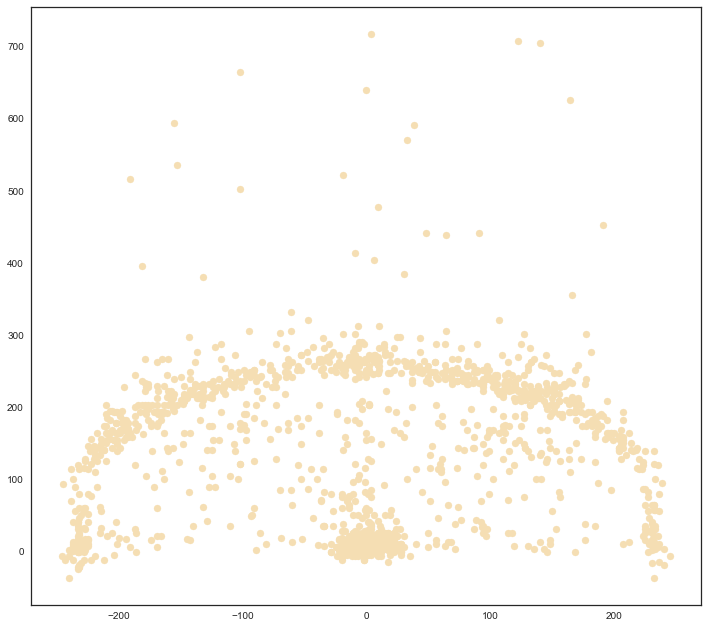

In [5]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(df_shots.LOC_X, df_shots.LOC_Y, color='wheat')
plt.show()

In [6]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='#191970', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color='blue', fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color='blue')

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color='blue', fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    #inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color='blue', fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color='blue', linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,  color='blue')

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0, linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, top_free_throw, bottom_free_throw,corner_three_a,
                      restricted,corner_three_b, three_arc, outer_box]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color='blue', fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

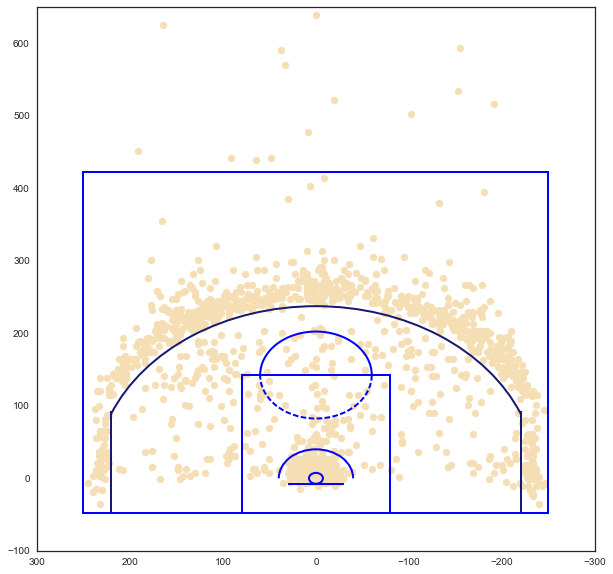

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(df_shots.LOC_X, df_shots.LOC_Y, color='wheat')
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.ylim(-100, 650)
plt.show()

In [8]:
df_shots.drop(['GRID_TYPE','GAME_ID','GAME_EVENT_ID','PLAYER_ID','PLAYER_NAME','TEAM_ID','TEAM_NAME','PERIOD','MINUTES_REMAINING','SECONDS_REMAINING','HTM','VTM','ACTION_TYPE'], axis=1, inplace=True)

In [9]:
threept = df_shots[df_shots['SHOT_TYPE'] == '3PT Field Goal']

In [10]:
#find the total number for 3pts attempted
shots_attempted = threept[threept['SHOT_ATTEMPTED_FLAG']]
totalshots = shots_attempted.count().max()

In [11]:
#drop the missed shots from total 3 pts attempted
made_shots = threept[threept['EVENT_TYPE'] == 'Made Shot']

In [12]:
#find total number of made shots
made_attempted = made_shots[made_shots['SHOT_ATTEMPTED_FLAG']]
totalmade = made_attempted.count().max()

In [13]:
#find the fg percentage of made shots
fgpercentage = totalmade / totalshots

In [14]:
fgpercentage * 100



40.98984771573604

In [15]:
#isolate each zones of the court
leftcolumn = threept[threept['LOC_X'] >= 79]
rightcolumn = threept[threept['LOC_X'] <= -79]
centercolumn = threept[threept['LOC_X'] <= 79]

upper = threept[threept['LOC_Y'] >= 142.5]

leftwing = leftcolumn[leftcolumn['LOC_Y'] >= 142.5]
rightwing = rightcolumn[rightcolumn['LOC_Y'] >= 142.5]
center = centercolumn[centercolumn['LOC_X'] >= -79]
leftcorner = leftcolumn[leftcolumn['LOC_Y'] <= 142.5]
rightcorner = rightcolumn[rightcolumn['LOC_Y'] <= 142.5]

### CENTER

In [16]:
#CENTER
#find the total 3pt shots attempted at the right wing
centeratt = center[center['SHOT_ATTEMPTED_FLAG']]
centershots = centeratt.count().max()
#drop the miss shots from the total 3 pts attempted
centermade = center[center['EVENT_TYPE'] == 'Made Shot']
#find the total number of made shots from the right wing
centerattempted = centermade[centermade['SHOT_ATTEMPTED_FLAG']]
centermade = centerattempted.count().max()
#find the fg percentage from the right wing
centerpercentage = centermade / centershots
centerpercentage * 100

33.165829145728644

### RIGHT WING

In [17]:
#RIGHT WING
#find the total 3pt shots attempted at the right wing
rtwingatt = rightwing[rightwing['SHOT_ATTEMPTED_FLAG']]
rtwingshots = rtwingatt.count().max()
#drop the miss shots from the total 3 pts attempted
rtwingmade = rightwing[rightwing['EVENT_TYPE'] == 'Made Shot']
#find the total number of made shots from the right wing
rtwingattempted = rtwingmade[rtwingmade['SHOT_ATTEMPTED_FLAG']]
rtwingmade = rtwingattempted.count().max()
#find the fg percentage from the right wing
rtwingpercentage = rtwingmade / rtwingshots
rtwingpercentage * 100

47.846889952153113

### LEFT WING

In [18]:
#LEFT WING
#find the total 3pt shots attempted at the right wing
ltwingatt = leftwing[leftwing['SHOT_ATTEMPTED_FLAG']]
ltwingshots = ltwingatt.count().max()
#drop the miss shots from the total 3 pts attempted
ltwingmade = leftwing[leftwing['EVENT_TYPE'] == 'Made Shot']
#find the total number of made shots from the right wing
ltwingattempted = ltwingmade[ltwingmade['SHOT_ATTEMPTED_FLAG']]
ltwingmade = ltwingattempted.count().max()
#find the fg percentage from the right wing
ltwingpercentage = ltwingmade / ltwingshots
ltwingpercentage * 100

38.325991189427313

### LEFT CORNER

In [19]:
#LEFT corner
#find the total 3pt shots attempted at the right wing
ltcorneratt = leftcorner[leftcorner['SHOT_ATTEMPTED_FLAG']]
ltcornershots = ltcorneratt.count().max()
#drop the miss shots from the total 3 pts attempted
ltcornermade = leftcorner[leftcorner['EVENT_TYPE'] == 'Made Shot']
#find the total number of made shots from the right wing
ltcornerattempted = ltcornermade[ltcornermade['SHOT_ATTEMPTED_FLAG']]
ltcornermade = ltcornerattempted.count().max()
#find the fg percentage from the right wing
ltcornerpercentage = ltcornermade / ltcornershots
ltcornerpercentage * 100

47.692307692307693

### RIGHT CORNER

In [20]:
#RIGHT corner
#find the total 3pt shots attempted at the right wing
rtcorneratt = rightcorner[rightcorner['SHOT_ATTEMPTED_FLAG']]
rtcornershots = rtcorneratt.count().max()
#drop the miss shots from the total 3 pts attempted
rtcornermade = rightcorner[rightcorner['EVENT_TYPE'] == 'Made Shot']
#find the total number of made shots from the right wing
rtcornerattempted = rtcornermade[rtcornermade['SHOT_ATTEMPTED_FLAG']]
rtcornermade = rtcornerattempted.count().max()
#find the fg percentage from the right wing
rtcornerpercentage = rtcornermade / rtcornershots
rtcornerpercentage * 100

43.333333333333336

In [21]:
#df_made.drop(['GRID_TYPE','GAME_ID','GAME_EVENT_ID','PLAYER_ID','PLAYER_NAME','TEAM_ID','TEAM_NAME','PERIOD','MINUTES_REMAINING','SECONDS_REMAINING','SHOT_ZONE_AREA','SHOT_DISTANCE','GAME_DATE','HTM','VTM','ACTION_TYPE','SHOT_TYPE'], axis=1, inplace=True)
#df_missed.drop(['GRID_TYPE','GAME_ID','GAME_EVENT_ID','PLAYER_ID','PLAYER_NAME','TEAM_ID','TEAM_NAME','PERIOD','MINUTES_REMAINING','SECONDS_REMAINING'], axis=1, inplace=True)
miss_shots = threept[threept['EVENT_TYPE'] == 'Missed Shot']



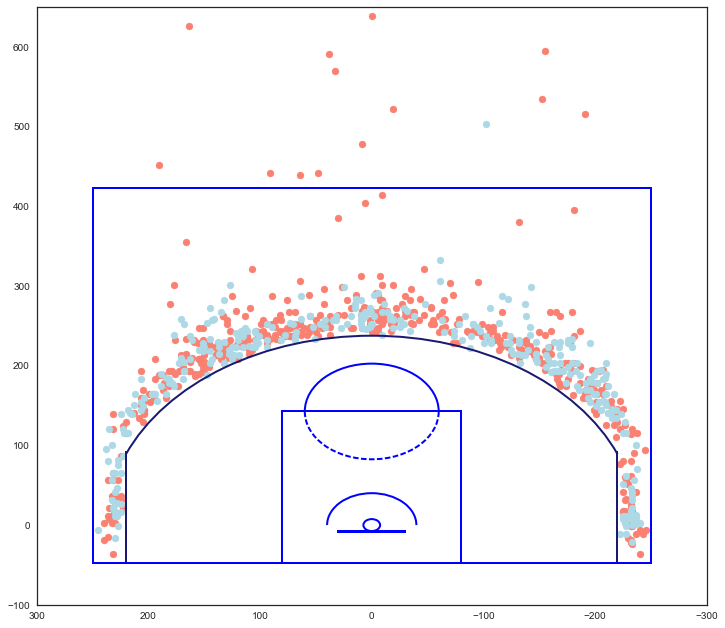

In [22]:
plt.figure(figsize=(12,11))
plt.scatter(miss_shots.LOC_X, miss_shots.LOC_Y, color='Salmon')
plt.scatter(made_shots.LOC_X, made_shots.LOC_Y, color='#add8e6')
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.ylim(-100,650)
plt.show()

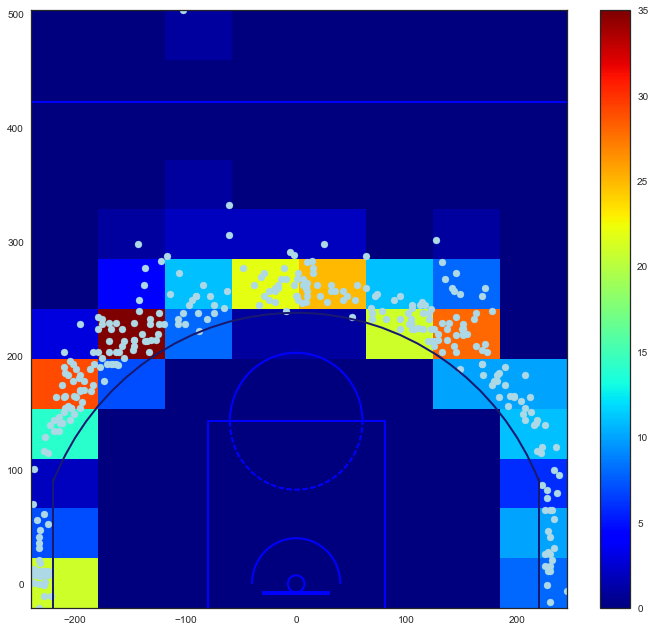

In [23]:
plt.figure(figsize=(12,11))
plt.scatter(made_shots.LOC_X, made_shots.LOC_Y, color='#add8e6')
draw_court(outer_lines=True)

plt.xlim(300,-300)
plt.ylim(-70,650)
#making heatmap
plt.hist2d(made_shots.LOC_X, made_shots.LOC_Y, (8, 12), cmap=plt.cm.jet)
plt.colorbar()

plt.show()

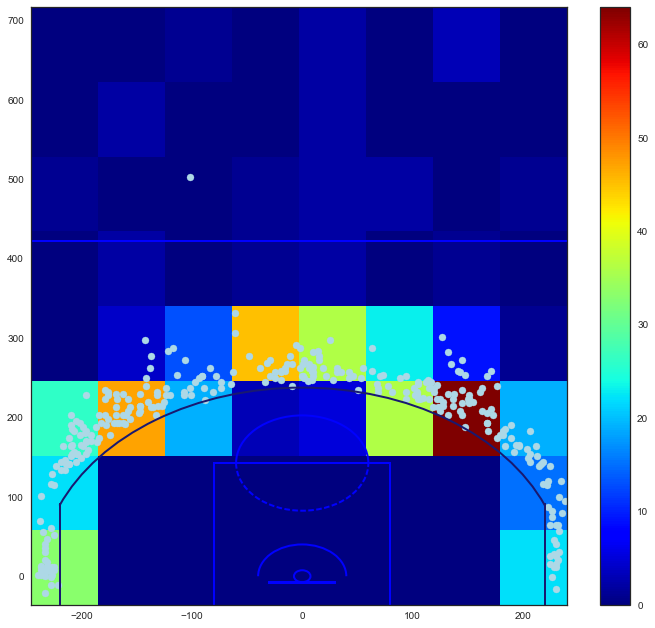

In [24]:
plt.figure(figsize=(12,11))
plt.scatter(made_shots.LOC_X, made_shots.LOC_Y, color='#add8e6')
draw_court(outer_lines=True)

plt.xlim(300,-300)
plt.ylim(-70,650)
#making heatmap
plt.hist2d(miss_shots.LOC_X, miss_shots.LOC_Y, (8, 8), cmap=plt.cm.jet)
plt.colorbar()

plt.show()

### Part 2: Data Analysis: Linear Regression based off of age and fg made